### Question: Should insurance comparison companies look into PIRP services?
***
#### And what type of customers should they target?

#### Explanation
Most insurance comparison sites make money by collecting commissions from the insurance companies they recommend on their sites. Whenever a customer visits their website, provides his or her information, receives a list of recommended quotes, and chooses one of those quotes as their insurance coverage plan, the comparison site rakes in a percentage of that money.

This is a great business model because it requires very little effort once the algorithms are in place. In other words, it's highly scalable. However, there is a significant challenge that can arise with a model like this: it's hard to find new customers. Once you recommend insurance to someone, they can do one of two things:
    
    1. Ignore your recommendations and go with somebody else.
    2. Choose one of your recommendations and not come back to you again.
        - Think about it. If you make a good recommendation, the customer will have no reason to come back because they're happy with the service. But if you don't make a good recommendation and they choose it anyway, they won't want to come back to you because your algorithm recommended an awful service.
        
So what can you do about this? Well, you can accept that "that's just the way things go" and move on (not a great option), or you can find ways to entice different types of customers to try your recommendation system. Again, since the algorithm is already in place, it shouldn't be difficult to adjust to different customer bases. Maybe a bit of algorithm tuning will be necessary, but that shouldn't be too expensive or time consuming.

So with that in mind, why not try looking into PIRP services? If you don't know what they are, here's a bit of context:

#### What is a PIRP?
_A point and insurance reduction program (PIRP) is a defensive driving course approved by the New York DMV that subtracts four points from a driver’s license and results in a 10% insurance discount, regardless of insurer. After taking a PIRP course, points are not directly removed from a driver’s record, but they do not count toward the 11 points that would cause a license suspension._

_To participate in the point and insurance reduction program, find a course that is approved by the state DMV, then register and complete the class. Most courses cost around 25 dollars and must take at least 320 minutes. Multiple providers offer online classes, meaning that you can complete a PIRP course in a COVID-safe manner. You should also check if the course provider automatically notifies the DMV and your insurance company when you finish the class; if not, send both your completion certificate._

_If you provide your insurer with proof of the course within 90 days of finishing it, the discount will be subtracted from your premium retroactively from your date of completion. After this 90-day window, the discount will apply starting on the date you give your certificate of completion to your insurer._

#### My Methodology

So, bearing all of this in mind, here's what I'm going to do in this notebook:

    1. I'm going to use a dataset titled "Motor Vehicle Point & Insurance Reduction Program (PIRP) Participation: Five Year Window" to develop an understanding of the types of people that are willing to pay 25 dollars to sit through 320 long minutes of driving instructions just to lower their interest rates. I will do this through the use of charts, graphs, and statistical analysis.

If you would like to download the dataset, here is the link: https://data.world/data-ny-gov/u925-8y2g
    
    2. I'm going to test my preconceived notions of these people and see what is true and what is incorrect.
    
    3. I'm going to thoroughly clean the data in the dataset so I can use it for a clustering model.
    
    4. Finally, I am going to use an offshoot of K-Means clustering called KPrototype to cluster the data and find what kinds of PIRP customers would be good to look for and advertise to.
    
So without further ado, let's dive into the data.

#### But first, we have to do the obligatory imports.

In [ ]:
!pip install pandas
!pip install -U matplotlib
!pip install seaborn
!pip install plotnine
!pip install sklearn
!pip install kmodes

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine
import statsmodels.api as sm
%matplotlib inline
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Now we need to import the data file into the notebook.
*And let's also take a look at what we're working with after we import it.

In [6]:
def read_file(filename):
    try:
        df = pd.read_csv(filename, low_memory=False)
        return df
    except:
        print('Please type an appropriate file path')

In [7]:
df = read_file('motor-vehicle-point-insurance-reduction-program-pirp-participation-five-year-window-1.csv')
df.head(20) 

,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count
0,1,2014,16,F,ALBANY,25 - USA TRAINING COMP,INTERNET,1
1,1,2014,16,F,ALBANY,29 - AMERICAN SAFETY COUNCIL,INTERNET,1
2,1,2014,16,F,CHEMUNG,29 - AMERICAN SAFETY COUNCIL,INTERNET,1
3,1,2014,16,F,ERIE,01 - NATL SAFETY COUNCIL,CLASSROOM,1
4,1,2014,16,F,ERIE,16 - DRIVER TRAINING ASSOC,INTERNET,2
5,1,2014,16,F,GENESEE,01 - NATL SAFETY COUNCIL,INTERNET,1
6,1,2014,16,F,MONROE,22 - AAA,CLASSROOM,1
7,1,2014,16,F,MONROE,27 - I DRIVE SAFELY,INTERNET,1
8,1,2014,16,F,MONROE,29 - AMERICAN SAFETY COUNCIL,INTERNET,4
9,1,2014,16,F,NASSAU,15 - NATL TRAFFIC SAFETY INST,INTERNET,1


### Part 1: EDA

More obligatory stuff. I need to see the data types I have, I need to see if there are any null values, I want to see the number of observations, and I also want to see all the columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478553 entries, 0 to 1478552
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Month                      1478553 non-null  int64 
 1   Year                       1478553 non-null  int64 
 2   Age at Completion          1478553 non-null  int64 
 3   Gender                     1478553 non-null  object
 4   County of Mailing Address  1478553 non-null  object
 5   Sponsor                    1478551 non-null  object
 6   Delivery Method            1478553 non-null  object
 7   Course Completion Count    1478553 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 90.2+ MB


'Month' and 'Year' are useless, but 'Age at Completion' and 'Course Completion Count' have some valuable info. 'Year' will probably be deleted, but 'Month' is worth using. It will need to be binned into seasons though. 'Age at Completion' will need to be binned as well.

In [9]:
df.describe()

,Month,Year,Age at Completion,Course Completion Count
count,1478553.000,1478553.000,1478553.000,1478553.000
mean,6.376,2016.031,48.455,2.728
std,3.423,1.413,18.615,3.859
min,1.000,2014.000,15.000,1.000
25%,3.000,2015.000,32.000,1.000
50%,6.000,2016.000,49.000,1.000
75%,9.000,2017.000,63.000,3.000
max,12.000,2018.000,111.000,65.000


The cell below ended up being somewhat useless, but I'll keep it here just in case I want to do more models in the future. However, this is a good time to explain why I decided to use a KPrototype model instead of K-Means:
    
    - K-Means works better when you're working with numerical data. I could turn my categorical data into numerical data (like I did in the cell below) and run a K-Means Clustering model with that, but it would be more beneficial for me to use a model that was built specifically for datasets with categorical data. It also makes the data more understandable for less data-savvy folks, and that's always something that needs be considered when you're modeling.

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df_factorized = df.copy()
char_cols = df_factorized.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df_factorized[c], label_mapping[c] = pd.factorize(df_factorized[c])
    
df_factorized

,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count
0,1,2014,16,0,0,0,0,1
1,1,2014,16,0,0,1,0,1
2,1,2014,16,0,1,1,0,1
3,1,2014,16,0,2,2,1,1
4,1,2014,16,0,2,3,0,2
...,...,...,...,...,...,...,...,...
1478548,12,2018,95,1,52,1,0,1
1478549,12,2018,95,1,5,7,1,1
1478550,12,2018,96,0,15,10,1,1
1478551,12,2018,96,1,15,10,1,1


This just shows the factors that were created above. For example, I can see that 'F' (which is short for Female) became __0__ in the dataset above and 'M' (Male) became __1__.

In [11]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in label_mapping.items() ]))

,Gender,County of Mailing Address,Sponsor,Delivery Method
0,F,ALBANY,25 - USA TRAINING COMP,INTERNET
1,M,CHEMUNG,29 - AMERICAN SAFETY COUNCIL,CLASSROOM
2,NaN,ERIE,01 - NATL SAFETY COUNCIL,NaN
3,NaN,GENESEE,16 - DRIVER TRAINING ASSOC,NaN
4,NaN,MONROE,22 - AAA,NaN
5,NaN,NASSAU,27 - I DRIVE SAFELY,NaN
6,NaN,ONEIDA,15 - NATL TRAFFIC SAFETY INST,NaN
7,NaN,ONONDAGA,21 - EMPIRE SAFETY COUNCIL,NaN
8,NaN,ONTARIO,28 - AMERICAN SAFETY INC,NaN
9,NaN,ORANGE,26 - NATL PT INS COURSE (AIPS),NaN


Since I have factorized data, I figured that I might as well do some quick EDA (Exploratory Data Analysis) and make histograms for all the columns in the dataset. This would not have worked so easily with categorical data.

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Age at Completion'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'County of Mailing Address'}>,
        <AxesSubplot:title={'center':'Sponsor'}>],
       [<AxesSubplot:title={'center':'Delivery Method'}>,
        <AxesSubplot:title={'center':'Course Completion Count'}>,
        <AxesSubplot:>]], dtype=object)

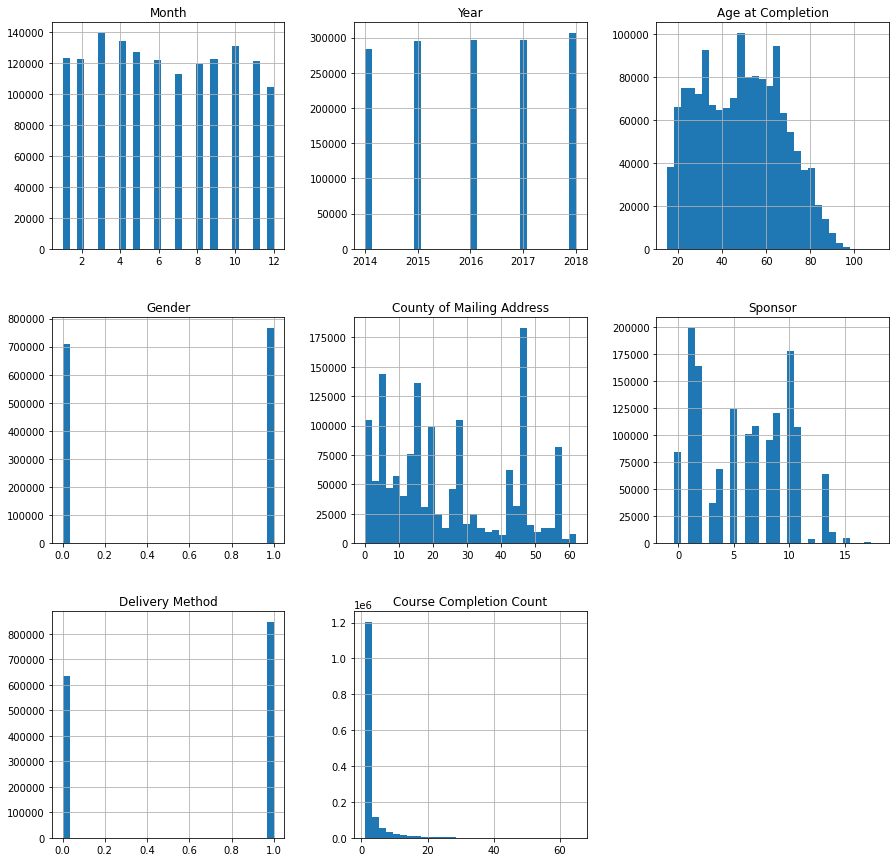

In [12]:
hist = df_factorized.hist(bins = 30, figsize=(15,15))
hist

So now we have histograms, but I still wanted to see the number of occurences of all the different values in each column (and I really wanted to see them without the Encoded Labels), so I made charts that show this information for each columns in the original dataset.

In [27]:
df['Month'].value_counts().to_frame()

,Month
3,139151
4,134052
10,130795
5,126784
1,123093
2,122695
9,122303
6,121818
11,120992
8,119103


In [30]:
def get_value_counts(column_values):
    columns_filter = list(filter(lambda n: n, column_values))
    columns_map = list(map(lambda n: df[n].value_counts().to_frame(), columns_filter))
    [display(columns_map[i]) for i in range(len(columns_map))]
        

def get_normalized_value_counts(column_values):
    columns_filt = list(filter(lambda n: n, column_values))
    columns_map_normalized = list(map(lambda n: df[n].value_counts(normalize=True).to_frame().mul(100).round(2).astype(str) + '%', columns_filt))
    [display(columns_map_normalized[i]) for i in range(len(columns_map_normalized))]

In [31]:
get_value_counts(df.columns.values)

,Month
3,139151
4,134052
10,130795
5,126784
1,123093
2,122695
9,122303
6,121818
11,120992
8,119103


,Year
2018,306323
2016,297203
2017,296129
2015,294792
2014,284106


,Age at Completion
53,26893
54,26877
55,26858
56,26730
57,26649
52,26542
58,26391
51,26321
59,25936
50,25814


,Gender
M,767552
F,711001


,County of Mailing Address
SUFFOLK,121331
NASSAU,120597
QUEENS,112594
KINGS,97675
WESTCHESTER,89865
BRONX,75929
RICHMOND,70660
ERIE,64039
NEW YORK,54033
ROCKLAND,50681


,Sponsor
29 - AMERICAN SAFETY COUNCIL,199859
04 - AARP,178570
01 - NATL SAFETY COUNCIL,164751
27 - I DRIVE SAFELY,124359
26 - NATL PT INS COURSE (AIPS),120717
21 - EMPIRE SAFETY COUNCIL,108351
18 - NY SAFETY PROGRAM,108124
15 - NATL TRAFFIC SAFETY INST,101570
28 - AMERICAN SAFETY INC,95976
25 - USA TRAINING COMP,84337


,Delivery Method
CLASSROOM,845596
INTERNET,632957


,Course Completion Count
1,826420
2,254530
3,121760
4,71737
5,46439
6,31202
7,23009
8,16908
9,13061
10,10344


I wanted to see percentages as well, so I normalized the data in these charts.

In [32]:
get_normalized_value_counts(df.columns.values)

,Month
3,9.41%
4,9.07%
10,8.85%
5,8.57%
1,8.33%
2,8.3%
9,8.27%
6,8.24%
11,8.18%
8,8.06%


,Year
2018,20.72%
2016,20.1%
2017,20.03%
2015,19.94%
2014,19.22%


,Age at Completion
53,1.82%
54,1.82%
55,1.82%
56,1.81%
57,1.8%
52,1.8%
58,1.78%
51,1.78%
59,1.75%
50,1.75%


,Gender
M,51.91%
F,48.09%


,County of Mailing Address
SUFFOLK,8.21%
NASSAU,8.16%
QUEENS,7.62%
KINGS,6.61%
WESTCHESTER,6.08%
BRONX,5.14%
RICHMOND,4.78%
ERIE,4.33%
NEW YORK,3.65%
ROCKLAND,3.43%


,Sponsor
29 - AMERICAN SAFETY COUNCIL,13.52%
04 - AARP,12.08%
01 - NATL SAFETY COUNCIL,11.14%
27 - I DRIVE SAFELY,8.41%
26 - NATL PT INS COURSE (AIPS),8.16%
21 - EMPIRE SAFETY COUNCIL,7.33%
18 - NY SAFETY PROGRAM,7.31%
15 - NATL TRAFFIC SAFETY INST,6.87%
28 - AMERICAN SAFETY INC,6.49%
25 - USA TRAINING COMP,5.7%


,Delivery Method
CLASSROOM,57.19%
INTERNET,42.81%


,Course Completion Count
1,55.89%
2,17.21%
3,8.24%
4,4.85%
5,3.14%
6,2.11%
7,1.56%
8,1.14%
9,0.88%
10,0.7%


Here are a couple issues I can see when I quickly glance through these charts:

    1. There are way too many ages. They need to be binned, as mentioned earlier. If they are not binned, there may be some grouping issues when we try to cluster the data.
    2. The years are pretty uniform. Further motivation to get rid of that column.

Now, let's bin the ages.

In [33]:
df['age_category'] = pd.cut(df['Age at Completion'], [-np.inf, 24, 35, 45, 55, 65, np.inf],
                              labels=['Under 25', '25-35', '36-45', '46-55', '56-65', 'Over 65'])

df

,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count,age_category
0,1,2014,16,F,ALBANY,25 - USA TRAINING COMP,INTERNET,1,Under 25
1,1,2014,16,F,ALBANY,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25
2,1,2014,16,F,CHEMUNG,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25
3,1,2014,16,F,ERIE,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25
4,1,2014,16,F,ERIE,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25
...,...,...,...,...,...,...,...,...,...
1478548,12,2018,95,M,COLUMBIA,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Over 65
1478549,12,2018,95,M,NASSAU,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,1,Over 65
1478550,12,2018,96,F,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65
1478551,12,2018,96,M,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65


Now we have bins for the ages (Under 25, 25-35, 36-45, 46-55, 56-65, and Over 65). This should make our K Prototype model a bit more accurate and useful.

I will now bin months to accommodate the seasons. I'm going with the Meteorological start of the seasons (the 1st of each transition month) because it is cleaner and works with the dataset better (since the data only gives the month number and not specific dates).

In [34]:
df['season_of_completion'] = pd.cut(df['Month'], [0, 2, 5, 8, 11, np.inf],
                              labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter'], ordered=False)

df

,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion
0,1,2014,16,F,ALBANY,25 - USA TRAINING COMP,INTERNET,1,Under 25,Winter
1,1,2014,16,F,ALBANY,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter
2,1,2014,16,F,CHEMUNG,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter
3,1,2014,16,F,ERIE,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25,Winter
4,1,2014,16,F,ERIE,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25,Winter
...,...,...,...,...,...,...,...,...,...,...
1478548,12,2018,95,M,COLUMBIA,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Over 65,Winter
1478549,12,2018,95,M,NASSAU,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,1,Over 65,Winter
1478550,12,2018,96,F,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65,Winter
1478551,12,2018,96,M,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65,Winter


#### Note: After I finished this project, I realized that there were two more columns that needed to be binned for better results: Sponsor & Course Completion. I go into more detail about why I did this and what I did in the **Epilogue (Improvements)** section, but I'm going to add these new binned columns to the dataframe now.

In [35]:
sponsor_cats = pd.cut(df['Sponsor'].value_counts(),bins = [0,500,3000,df['Sponsor'].value_counts(ascending=False).max()],labels = ['Small/Local Sponsor','Mid-Size Sponsor','Large Sponsor'])
df['sponsor_class'] = df['Sponsor'].map(sponsor_cats)

df['course_comp_class'] = pd.cut(df['Course Completion Count'], [-np.inf, 1, 4, 10, np.inf],
                              labels=['One-and-Done', '2 to 3', '4 to 10', 'Over 10'])

df

,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class
0,1,2014,16,F,ALBANY,25 - USA TRAINING COMP,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
1,1,2014,16,F,ALBANY,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
2,1,2014,16,F,CHEMUNG,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
3,1,2014,16,F,ERIE,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25,Winter,Large Sponsor,One-and-Done
4,1,2014,16,F,ERIE,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25,Winter,Large Sponsor,2 to 3
...,...,...,...,...,...,...,...,...,...,...,...,...
1478548,12,2018,95,M,COLUMBIA,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Over 65,Winter,Large Sponsor,One-and-Done
1478549,12,2018,95,M,NASSAU,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,1,Over 65,Winter,Large Sponsor,One-and-Done
1478550,12,2018,96,F,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65,Winter,Large Sponsor,One-and-Done
1478551,12,2018,96,M,SUFFOLK,04 - AARP,CLASSROOM,1,Over 65,Winter,Large Sponsor,One-and-Done


### Part 2: Data Cleaning

Before we start modeling, I want to check for null values. There are two in the Sponsor column. Since there are over 1 million data points, we can get rid of those two rows without affecting the data in any significant way.

In [36]:
df.isna().sum()

Month                        0
Year                         0
Age at Completion            0
Gender                       0
County of Mailing Address    0
Sponsor                      2
Delivery Method              0
Course Completion Count      0
age_category                 0
season_of_completion         0
sponsor_class                2
course_comp_class            0
dtype: int64

In [38]:
len(df)

1478551

In [37]:
df = df.dropna()
print(df.isna().sum())
print()
print(len(df))

Month                        0
Year                         0
Age at Completion            0
Gender                       0
County of Mailing Address    0
Sponsor                      0
Delivery Method              0
Course Completion Count      0
age_category                 0
season_of_completion         0
sponsor_class                0
course_comp_class            0
dtype: int64

1478551


I want to go ahead and get rid of County of Mailing Address. It's not very useful for what we're looking for. It might have been useful if this was a New York specific project and we were looking for people to target specifically in that state, but this isn't that. So it would be a bad idea to create clusters that are New York centric.

In [39]:
df = df.drop(['County of Mailing Address'], 1)
df.head()

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/3308702355.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


,Month,Year,Age at Completion,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class
0,1,2014,16,F,25 - USA TRAINING COMP,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
1,1,2014,16,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
2,1,2014,16,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
3,1,2014,16,F,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25,Winter,Large Sponsor,One-and-Done
4,1,2014,16,F,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25,Winter,Large Sponsor,2 to 3


### Part 3: Hypothesis (Assumption) Testing

Before I start modeling, I have a few hypotheses that I would like to test. I want to see if my assumptions about people behave are correct or incorrect before I start making any models (that could be incorrectly interpreted by poor assumptions):

    1. I think younger people are more attracted to online courses than older people. I think the reasoning for this should be fairly obvious if you know any boomers.
    
    2. I think younger adults (25-35) are more willing to do multiple courses because they typically earn less than older people and are consequently more concerned about saving every dollar. They also have more energy to complete multiple courses. Older folks may not be as willing to keep going back just to save a few dollars.
    
    3. I think that there will be more course completions in the winter and summer months. People generally take big breaks during those seasons, so they will theoretically have more time to sit down and complete a boring, 320 minute driving course.
    
    4. I think that there will be no type of correlation when it comes to sponsors. I don't think that certain sponsors favor certain age groups, genders, delivery methods, or seasons. I'm probably wrong about this, but it's just a hunch.

#### Assumption #1: I think younger people are more attracted to online courses than older people.
Let's test this and see if it's true.

In [40]:
age_group = df.groupby(['age_category','Delivery Method']).size()
age_group = age_group.reset_index(name='count')
age_group

,age_category,Delivery Method,count
0,Under 25,CLASSROOM,79253
1,Under 25,INTERNET,99505
2,25-35,CLASSROOM,127885
3,25-35,INTERNET,134346
4,36-45,CLASSROOM,119075
5,36-45,INTERNET,101877
6,46-55,CLASSROOM,145423
7,46-55,INTERNET,112421
8,56-65,CLASSROOM,150928
9,56-65,INTERNET,101966


In [41]:
age_group['pct'] = age_group.groupby(['age_category'])['count'].apply(lambda x: (x.astype(float).div(x.sum()).mul(100).round(2).astype(str) + '%' ))
age_group

,age_category,Delivery Method,count,pct
0,Under 25,CLASSROOM,79253,44.34%
1,Under 25,INTERNET,99505,55.66%
2,25-35,CLASSROOM,127885,48.77%
3,25-35,INTERNET,134346,51.23%
4,36-45,CLASSROOM,119075,53.89%
5,36-45,INTERNET,101877,46.11%
6,46-55,CLASSROOM,145423,56.4%
7,46-55,INTERNET,112421,43.6%
8,56-65,CLASSROOM,150928,59.68%
9,56-65,INTERNET,101966,40.32%


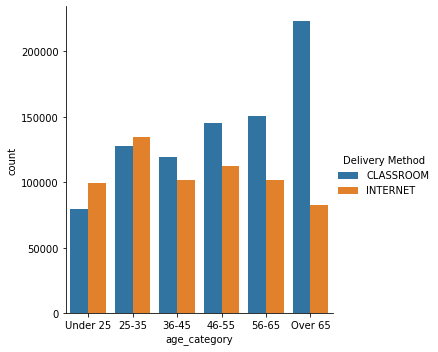

In [42]:
fg = sns.catplot(x='age_category', y='count', hue='Delivery Method', kind='bar', data=age_group)

Well, it's not glaringly obvious for younger people, but older people definitely prefer in-person training. No surprise there, but I was almost certain that there would be more younger people that preferred online course options. I guess it's just an introvert thing or something.

#### Assumption #2: I think younger adults (25-35) are more willing to do multiple courses.
Let's check this.

In [43]:
course_comp_group = df.groupby(['age_category']).mean()
course_comp_group['Course Completion Count']

age_category
Under 25   2.334
25-35      3.030
36-45      3.078
46-55      3.093
56-65      2.690
Over 65    2.172
Name: Course Completion Count, dtype: float64

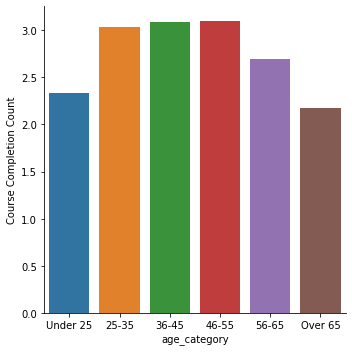

In [44]:
fg2 = sns.catplot(x='age_category', y='Course Completion Count', hue='age_category', kind='bar', dodge=False, data=course_comp_group.reset_index())


In [45]:
course_comp_group_median = df.groupby(['age_category']).median()
course_comp_group_median['Course Completion Count']

age_category
Under 25   1.000
25-35      1.000
36-45      1.000
46-55      1.000
56-65      1.000
Over 65    1.000
Name: Course Completion Count, dtype: float64

So the median for every age group is the same. __Most__ people are one-and-done. However, adults from 25-55 on average seem much more willing to go back for more courses if their insurance hikes up. Folks over 65 couldn't care less though. I understand.

#### Assumption #3: I think that there will be more course completions in the winter and summer months.
Let's see if I'm wrong again.

In [46]:
season_of_completion_group = df.groupby(['season_of_completion']).sum()
season_of_completion_group['Course Completion Count'].sort_values(ascending = False)

season_of_completion
Spring    1118477
Autumn    1017983
Summer     955530
Winter     942143
Name: Course Completion Count, dtype: int64

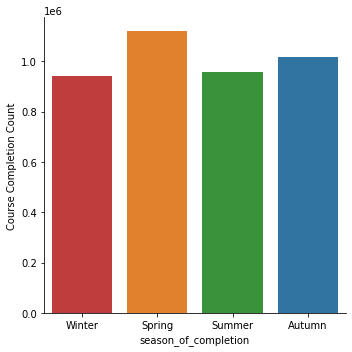

In [47]:
fg2 = sns.catplot(x='season_of_completion', y='Course Completion Count', hue='season_of_completion', kind='bar', order=['Winter','Spring','Summer','Autumn'], dodge=False, data=season_of_completion_group.reset_index())


Wrong again. I guess Spring break gives people enough time to trudge through a boring driving course.

#### Assumption #4: I think that there will be no type of correlation when it comes to sponsors.
0 for 4?

In [48]:
df.Sponsor.value_counts()

29 - AMERICAN SAFETY COUNCIL       199859
04 - AARP                          178570
01 - NATL SAFETY COUNCIL           164751
27 - I DRIVE SAFELY                124359
26 - NATL PT INS COURSE (AIPS)     120717
21 - EMPIRE SAFETY COUNCIL         108351
18 - NY SAFETY PROGRAM             108124
15 - NATL TRAFFIC SAFETY INST      101570
28 - AMERICAN SAFETY INC            95976
25 - USA TRAINING COMP              84337
22 - AAA                            68432
35 - NY DEFENSIVE DRIVER COURSE     64365
16 - DRIVER TRAINING ASSOC          37301
05 - NYSED - SUFFOLK BOCES          10444
20 - NYS DOT                         4920
34 - TRAFFIC SFTY CNSLTNTS           4041
37 - NEW YORK DRIVER INC (NYDI)      1243
08 - NASSAU CO PD                     674
06 - SUFFOLK CO PD                    517
Name: Sponsor, dtype: int64

This function basically makes a dataframe that shows the percent makeup of each value of each specified column (in this case, the columns are 'age_category', 'Gender', 'Delivery Method', and 'season_of_completion').

In [49]:
def make_crosstab(crosstab_variable):
    age_group_list = df[crosstab_variable].astype('category').unique().to_list()
    age_group_list.append('All')
    sponsor_crosstab = pd.crosstab(df[crosstab_variable], df['Sponsor'], margins = True).reindex(age_group_list, axis = 0)
    sponsor_crosstab.columns.name = None
    sponsor_crosstab = sponsor_crosstab.transpose().sort_values('All', ascending=False).iloc[1:]
    sponsor_crosstab = sponsor_crosstab.drop(['All'],1).apply(lambda x: x.astype(float).div(x.sum()).mul(100).round(2).astype(str) + '%' , axis=1)
    return sponsor_crosstab

In [50]:
age_sponsors = make_crosstab('age_category')
age_sponsors

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/2321203002.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


age_category,Under 25,25-35,36-45,46-55,56-65,Over 65
29 - AMERICAN SAFETY COUNCIL,16.85%,20.13%,15.83%,17.24%,15.52%,14.44%
04 - AARP,2.98%,4.07%,3.58%,10.15%,22.0%,57.22%
01 - NATL SAFETY COUNCIL,12.19%,19.75%,17.0%,20.1%,17.79%,13.16%
27 - I DRIVE SAFELY,15.83%,21.63%,17.14%,18.25%,15.58%,11.57%
26 - NATL PT INS COURSE (AIPS),14.59%,20.76%,17.19%,18.91%,15.69%,12.86%
21 - EMPIRE SAFETY COUNCIL,12.14%,16.86%,14.97%,17.17%,16.49%,22.38%
18 - NY SAFETY PROGRAM,11.36%,20.77%,17.97%,19.9%,16.94%,13.06%
15 - NATL TRAFFIC SAFETY INST,12.3%,20.58%,17.01%,19.15%,16.81%,14.16%
28 - AMERICAN SAFETY INC,12.56%,19.86%,17.14%,18.06%,15.52%,16.86%
25 - USA TRAINING COMP,13.25%,21.83%,18.42%,17.77%,14.66%,14.08%


I figured that the best way to find big outliers would be to subtract the maximum value in each row from the minimum value. That way, if one of these differences is large, we can find it quickly and see what the Sponsor is.

In [51]:
age_sponsors['difference_max_minus_mean'] = age_sponsors[age_sponsors.columns.values].replace('[\%,]', '', regex=True).astype(float).max(axis=1) - age_sponsors[age_sponsors.columns.values].replace('[\%,]', '', regex=True).astype(float).min(axis=1)
age_sponsors

age_category,Under 25,25-35,36-45,46-55,56-65,Over 65,difference_max_minus_mean
29 - AMERICAN SAFETY COUNCIL,16.85%,20.13%,15.83%,17.24%,15.52%,14.44%,5.690
04 - AARP,2.98%,4.07%,3.58%,10.15%,22.0%,57.22%,54.240
01 - NATL SAFETY COUNCIL,12.19%,19.75%,17.0%,20.1%,17.79%,13.16%,7.910
27 - I DRIVE SAFELY,15.83%,21.63%,17.14%,18.25%,15.58%,11.57%,10.060
26 - NATL PT INS COURSE (AIPS),14.59%,20.76%,17.19%,18.91%,15.69%,12.86%,7.900
21 - EMPIRE SAFETY COUNCIL,12.14%,16.86%,14.97%,17.17%,16.49%,22.38%,10.240
18 - NY SAFETY PROGRAM,11.36%,20.77%,17.97%,19.9%,16.94%,13.06%,9.410
15 - NATL TRAFFIC SAFETY INST,12.3%,20.58%,17.01%,19.15%,16.81%,14.16%,8.280
28 - AMERICAN SAFETY INC,12.56%,19.86%,17.14%,18.06%,15.52%,16.86%,7.300
25 - USA TRAINING COMP,13.25%,21.83%,18.42%,17.77%,14.66%,14.08%,8.580


Whoops. My assumption is already wrong. I didn't think about AARP. It also seems like younger folks aren't big fans of AAA. But we sure love the police department. I'm sure there's a long story there that I probably don't want to dig too deep into, so I'll just stop there.

Now let's try gender.

In [52]:
men_women_sponsors = make_crosstab('Gender')
men_women_sponsors

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/2321203002.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Gender,F,M
29 - AMERICAN SAFETY COUNCIL,49.87%,50.13%
04 - AARP,54.21%,45.79%
01 - NATL SAFETY COUNCIL,46.81%,53.19%
27 - I DRIVE SAFELY,46.97%,53.03%
26 - NATL PT INS COURSE (AIPS),46.89%,53.11%
21 - EMPIRE SAFETY COUNCIL,46.82%,53.18%
18 - NY SAFETY PROGRAM,47.1%,52.9%
15 - NATL TRAFFIC SAFETY INST,50.31%,49.69%
28 - AMERICAN SAFETY INC,45.85%,54.15%
25 - USA TRAINING COMP,44.81%,55.19%


In [53]:
men_women_sponsors['Difference'] = men_women_sponsors['F'].replace('[\%,]', '', regex=True).astype(float) - men_women_sponsors['M'].replace('[\%,]', '', regex=True).astype(float)
men_women_sponsors

Gender,F,M,Difference
29 - AMERICAN SAFETY COUNCIL,49.87%,50.13%,-0.260
04 - AARP,54.21%,45.79%,8.420
01 - NATL SAFETY COUNCIL,46.81%,53.19%,-6.380
27 - I DRIVE SAFELY,46.97%,53.03%,-6.060
26 - NATL PT INS COURSE (AIPS),46.89%,53.11%,-6.220
21 - EMPIRE SAFETY COUNCIL,46.82%,53.18%,-6.360
18 - NY SAFETY PROGRAM,47.1%,52.9%,-5.800
15 - NATL TRAFFIC SAFETY INST,50.31%,49.69%,0.620
28 - AMERICAN SAFETY INC,45.85%,54.15%,-8.300
25 - USA TRAINING COMP,44.81%,55.19%,-10.380


Wrong again. Big difference in Nassau CO PD (Police Department), Suffolk CO PD, and NYS DOT. NYSED - Suffolk BOCES also has a noticeable difference.

Now let's try Delivery Methods.

In [54]:
delivery_sponsors = make_crosstab('Delivery Method')
delivery_sponsors

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/2321203002.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Delivery Method,INTERNET,CLASSROOM
29 - AMERICAN SAFETY COUNCIL,99.07%,0.93%
04 - AARP,32.05%,67.95%
01 - NATL SAFETY COUNCIL,37.76%,62.24%
27 - I DRIVE SAFELY,72.14%,27.86%
26 - NATL PT INS COURSE (AIPS),71.53%,28.47%
21 - EMPIRE SAFETY COUNCIL,6.89%,93.11%
18 - NY SAFETY PROGRAM,42.86%,57.14%
15 - NATL TRAFFIC SAFETY INST,15.74%,84.26%
28 - AMERICAN SAFETY INC,24.2%,75.8%
25 - USA TRAINING COMP,26.93%,73.07%


In [55]:
delivery_sponsors['Difference'] = delivery_sponsors['INTERNET'].replace('[\%,]', '', regex=True).astype(float) - delivery_sponsors['CLASSROOM'].replace('[\%,]', '', regex=True).astype(float)
delivery_sponsors

Delivery Method,INTERNET,CLASSROOM,Difference
29 - AMERICAN SAFETY COUNCIL,99.07%,0.93%,98.140
04 - AARP,32.05%,67.95%,-35.900
01 - NATL SAFETY COUNCIL,37.76%,62.24%,-24.480
27 - I DRIVE SAFELY,72.14%,27.86%,44.280
26 - NATL PT INS COURSE (AIPS),71.53%,28.47%,43.060
21 - EMPIRE SAFETY COUNCIL,6.89%,93.11%,-86.220
18 - NY SAFETY PROGRAM,42.86%,57.14%,-14.280
15 - NATL TRAFFIC SAFETY INST,15.74%,84.26%,-68.520
28 - AMERICAN SAFETY INC,24.2%,75.8%,-51.600
25 - USA TRAINING COMP,26.93%,73.07%,-46.140


Yep, wrong again. There are even organizations that exclusively provide classroom instruction.

Finally, let's look at the seasons.

In [56]:
season_sponsors = make_crosstab('season_of_completion')
season_sponsors

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/2321203002.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


season_of_completion,Winter,Spring,Summer,Autumn
29 - AMERICAN SAFETY COUNCIL,25.26%,25.9%,24.69%,24.15%
04 - AARP,19.73%,28.78%,24.71%,26.78%
01 - NATL SAFETY COUNCIL,24.18%,27.72%,23.02%,25.08%
27 - I DRIVE SAFELY,25.17%,26.17%,24.41%,24.25%
26 - NATL PT INS COURSE (AIPS),24.15%,26.21%,24.53%,25.11%
21 - EMPIRE SAFETY COUNCIL,24.17%,26.49%,22.27%,27.07%
18 - NY SAFETY PROGRAM,24.33%,27.72%,23.51%,24.44%
15 - NATL TRAFFIC SAFETY INST,23.28%,28.56%,21.91%,26.24%
28 - AMERICAN SAFETY INC,23.94%,26.48%,23.75%,25.82%
25 - USA TRAINING COMP,24.76%,25.85%,24.63%,24.76%


In [57]:
season_sponsors['difference_max_minus_mean'] = season_sponsors[season_sponsors.columns.values].replace('[\%,]', '', regex=True).astype(float).max(axis=1) - season_sponsors[season_sponsors.columns.values].replace('[\%,]', '', regex=True).astype(float).min(axis=1)
season_sponsors

season_of_completion,Winter,Spring,Summer,Autumn,difference_max_minus_mean
29 - AMERICAN SAFETY COUNCIL,25.26%,25.9%,24.69%,24.15%,1.750
04 - AARP,19.73%,28.78%,24.71%,26.78%,9.050
01 - NATL SAFETY COUNCIL,24.18%,27.72%,23.02%,25.08%,4.700
27 - I DRIVE SAFELY,25.17%,26.17%,24.41%,24.25%,1.920
26 - NATL PT INS COURSE (AIPS),24.15%,26.21%,24.53%,25.11%,2.060
21 - EMPIRE SAFETY COUNCIL,24.17%,26.49%,22.27%,27.07%,4.800
18 - NY SAFETY PROGRAM,24.33%,27.72%,23.51%,24.44%,4.210
15 - NATL TRAFFIC SAFETY INST,23.28%,28.56%,21.91%,26.24%,6.650
28 - AMERICAN SAFETY INC,23.94%,26.48%,23.75%,25.82%,2.730
25 - USA TRAINING COMP,24.76%,25.85%,24.63%,24.76%,1.220


And again, I was wrong. Suffolk CO PD and New York Driver Inc (NYDI) both see a noticeable uptick in activity in the spring.

Now that my assumptions have been tested and I've been proven wrong, let's make a model.

## Part 4: Modeling

Let's look at df again just to make sure everything is still looking alright after all the EDA we just did.

In [58]:
df.head()

,Month,Year,Age at Completion,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class
0,1,2014,16,F,25 - USA TRAINING COMP,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
1,1,2014,16,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
2,1,2014,16,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
3,1,2014,16,F,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25,Winter,Large Sponsor,One-and-Done
4,1,2014,16,F,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25,Winter,Large Sponsor,2 to 3


Since Month, Year, and Age at Completion don't really serve a purpose anymore, let's get rid of those variables too.

In [59]:
df = df.drop(['Month', 'Year', 'Age at Completion'], 1)
df.head()

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_92526/1384698199.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class
0,F,25 - USA TRAINING COMP,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
1,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
2,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,Under 25,Winter,Large Sponsor,One-and-Done
3,F,01 - NATL SAFETY COUNCIL,CLASSROOM,1,Under 25,Winter,Large Sponsor,One-and-Done
4,F,16 - DRIVER TRAINING ASSOC,INTERNET,2,Under 25,Winter,Large Sponsor,2 to 3


Now, in order for the KPrototype model to work, we need to make sure that we know the positions of the categorical columns in our dataset. The categorical columns in this dataset are either denoted as 'object' or 'category'. Category variables are great to use when you want your model to run a bit faster. Since age_category and season_of_completion were created by me and since they were created with a repetitive function (they were created with pd.cut and that basically iterated over each row to find observations that fit my criteria), they were saved as 'category' variables.

In [60]:
df.dtypes

Gender                       object
Sponsor                      object
Delivery Method              object
Course Completion Count       int64
age_category               category
season_of_completion       category
sponsor_class              category
course_comp_class          category
dtype: object

Let's list the categorical columns and the positions of those columns to make sure everything's right.

In [61]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes(['object', 'category']).columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes(['object','category']).columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Gender', 'Sponsor', 'Delivery Method', 'age_category', 'season_of_completion', 'sponsor_class', 'course_comp_class']
Categorical columns position  : [0, 1, 2, 4, 5, 6, 7]


Unfortunately, we're not going to use this cell. I tried, but the model takes WAY too long to run. There are over 1 million rows, so I understand. But in order to get something that runs, I created a random sample of the original dataframe.

In [40]:
#dfMatrix = df.to_numpy()
#dfMatrix

array([['F', '25 - USA TRAINING COMP', 'INTERNET', 1, 'Under 25',
        'Winter'],
       ['F', '29 - AMERICAN SAFETY COUNCIL', 'INTERNET', 1, 'Under 25',
        'Winter'],
       ['F', '29 - AMERICAN SAFETY COUNCIL', 'INTERNET', 1, 'Under 25',
        'Winter'],
       ...,
       ['F', '04 - AARP', 'CLASSROOM', 1, 'Over 65', 'Winter'],
       ['M', '04 - AARP', 'CLASSROOM', 1, 'Over 65', 'Winter'],
       ['M', '21 - EMPIRE SAFETY COUNCIL', 'CLASSROOM', 1, 'Over 65',
        'Winter']], dtype=object)

And here's that sample. Also, it's important to note that I created a numpy matrix version of my dataframe. The model will still run if you don't do this, but it helps it run a little faster.

In [71]:
sampledf = df.sample(50000, random_state = 7)
sampledfMatrix = sampledf.to_numpy()
print(sampledfMatrix)
print(len(sampledfMatrix))

[['F' '29 - AMERICAN SAFETY COUNCIL' 'INTERNET' ... 'Autumn'
  'Large Sponsor' '2 to 3']
 ['F' '35 - NY DEFENSIVE DRIVER COURSE' 'CLASSROOM' ... 'Summer'
  'Large Sponsor' '2 to 3']
 ['M' '01 - NATL SAFETY COUNCIL' 'INTERNET' ... 'Spring' 'Large Sponsor'
  'One-and-Done']
 ...
 ['M' '01 - NATL SAFETY COUNCIL' 'INTERNET' ... 'Winter' 'Large Sponsor'
  '2 to 3']
 ['M' '29 - AMERICAN SAFETY COUNCIL' 'INTERNET' ... 'Summer'
  'Large Sponsor' 'Over 10']
 ['F' '21 - EMPIRE SAFETY COUNCIL' 'CLASSROOM' ... 'Spring'
  'Large Sponsor' 'One-and-Done']]
50000


Now let's finally run this model. In this cell, I am trying to find the optimal number of clusters for the data. We will determine the optimal number, by calculating the cost that comes along with using 1,2,3...and 9 clusters. I don't want to bring the penalty down to 0 (because then I'd just have 1 million+ clusters), but I do want to bring it down to a point where the loss becomes relatively marginal. At that point, I should have an interpretable amount of clusters and a __relatively__ low cost. So that's what we're aiming for.

In [73]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 7)
        kprototype.fit_predict(sampledfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [74]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

Let's plot the costs for each number of clusters and find the optimal cluster model.

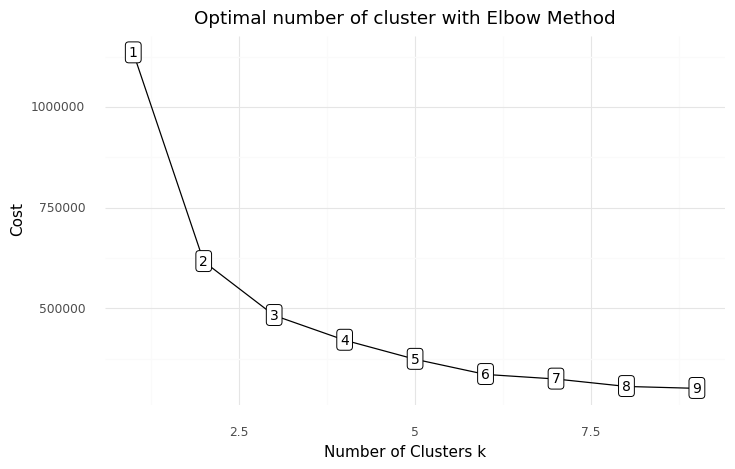

<ggplot: (8786523433756)>

In [75]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

I think the dropoff becomes marginal after 5 clusters, so I'm going to choose a model with 5 clusters.

In [76]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 7)
kprototype.fit_predict(sampledfMatrix, categorical = catColumnsPos)

array([3, 3, 0, ..., 3, 1, 4], dtype=uint16)

Let's take a look at the cluster centroids (you can think of these as the...hmmm...you can think of them as the head Mean Girl. It's the data point that all the data points around it are trying to be like. Hopefully that makes some kind of sense.)

And let's also look at the cost of our model.

In [77]:
print('Cluster Centroids:')
print(kprototype.cluster_centroids_)
print()

print('Model Cost:')
print(kprototype.cost_)
print()

Cluster Centroids:
[['1.1250978200111794' 'M' '29 - AMERICAN SAFETY COUNCIL' 'INTERNET'
  '25-35' 'Autumn' 'Large Sponsor' 'One-and-Done']
 ['8.735265465172917' 'M' '29 - AMERICAN SAFETY COUNCIL' 'CLASSROOM'
  '25-35' 'Spring' 'Large Sponsor' '4 to 10']
 ['22.56913470115968' 'M' '21 - EMPIRE SAFETY COUNCIL' 'CLASSROOM'
  '25-35' 'Spring' 'Large Sponsor' 'Over 10']
 ['3.1784322217410135' 'M' '29 - AMERICAN SAFETY COUNCIL' 'CLASSROOM'
  '46-55' 'Summer' 'Large Sponsor' '2 to 3']
 ['1.216977441648194' 'F' '04 - AARP' 'CLASSROOM' 'Over 65' 'Spring'
  'Large Sponsor' 'One-and-Done']]

Model Cost:
377748.42652622494



Let's add the new cluster data to our sample dataframe...

In [78]:
sampledf['Cluster Labels'] = kprototype.labels_
sampledf['Segment'] = sampledf['Cluster Labels'].map({0:'First Cluster', 1:'Second Cluster', 2:'Third Cluster', 3:'Fourth Cluster', 4:'Fifth Cluster'})

sampledf['Segment'] = sampledf['Segment'].astype('category')
sampledf['Segment'] = sampledf['Segment'].cat.reorder_categories(['First Cluster','Second Cluster','Third Cluster','Fourth Cluster','Fifth Cluster'])

sampledf

,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class,Cluster Labels,Segment
1221215,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,4,Over 65,Autumn,Large Sponsor,2 to 3,3,Fourth Cluster
794351,F,35 - NY DEFENSIVE DRIVER COURSE,CLASSROOM,4,25-35,Summer,Large Sponsor,2 to 3,3,Fourth Cluster
564962,M,01 - NATL SAFETY COUNCIL,INTERNET,1,Over 65,Spring,Large Sponsor,One-and-Done,0,First Cluster
349677,M,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,2,56-65,Spring,Large Sponsor,2 to 3,3,Fourth Cluster
514745,M,26 - NATL PT INS COURSE (AIPS),INTERNET,2,Over 65,Spring,Large Sponsor,2 to 3,4,Fifth Cluster
...,...,...,...,...,...,...,...,...,...,...
1023856,F,27 - I DRIVE SAFELY,INTERNET,2,Under 25,Autumn,Large Sponsor,2 to 3,0,First Cluster
1059797,F,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,46-55,Autumn,Large Sponsor,One-and-Done,0,First Cluster
112580,M,01 - NATL SAFETY COUNCIL,INTERNET,2,46-55,Winter,Large Sponsor,2 to 3,3,Fourth Cluster
794837,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,11,25-35,Summer,Large Sponsor,Over 10,1,Second Cluster


...and then let's take a look at our cluster centroids and the number of points within each cluster.

In [79]:
sampledf.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
sampledf.groupby('Segment').agg(
    {
        'Total':'count',
        'Gender': lambda x: x.value_counts().index[0],
        'Sponsor': lambda x: x.value_counts().index[0],
        'Delivery Method': lambda x: x.value_counts().index[0],
        'Course Completion Count': 'mean',
        'age_category': lambda x: x.value_counts().index[0],
        'season_of_completion': lambda x: x.value_counts().index[0],
        'sponsor_class': lambda x: x.value_counts().index[0],
        'course_comp_class': lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Total,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,sponsor_class,course_comp_class
0,First Cluster,17890,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,1.125,25-35,Autumn,Large Sponsor,One-and-Done
1,Second Cluster,4106,M,29 - AMERICAN SAFETY COUNCIL,CLASSROOM,8.735,25-35,Spring,Large Sponsor,4 to 10
2,Third Cluster,1121,M,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,22.569,25-35,Spring,Large Sponsor,Over 10
3,Fourth Cluster,11545,M,29 - AMERICAN SAFETY COUNCIL,CLASSROOM,3.178,46-55,Summer,Large Sponsor,2 to 3
4,Fifth Cluster,15338,F,04 - AARP,CLASSROOM,1.217,Over 65,Spring,Large Sponsor,One-and-Done


### Conclusion
And we're done! We have our 5 clusters and we can see what types of customers that are good for targeting. I would personally avoid customers from the First and Fifth clusters because they're mostly one-and-done folks, but I would heavily advertise to clusters 2 and 3. They seem like they're willing to do everything in their power to lower their insurance prices. And I would target them even more heavily in the Spring.

~~Now, after looking at these clusters, there is one glaring improvement that I would make. I would go back and bin sponsors. The sponsors with higher numbers of customers would be classified as 'Big Sponsors', the sponsors in the middle would be 'Mid-Sized Sponsors', and sponsors with the lowest amounts of customers would be binned as 'Small/Local Sponsors'. I think that would allow for an even more advanced level of targeting on the B2B side. It might also help when discussing commission rates.~~

In [80]:
sampledf.to_csv('new_sampledfout.csv',index=False)

### Tableau Dashboard

If you would like to view the Tableau dashboard I made for this clustering project, you can view it here: https://public.tableau.com/views/PIRPStudyVersion2_16472320217400/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

#### Epilogue (Improvements):

I went ahead and created a new column in the sample dataset called 'sponsor_class' based on the number of times each sponsor appears in the dataset. "Large Sponsors" are sponsors that have between 3000 and 6710 observations, "Mid-Size Sponsors" have between 500 and 3000, and "Small/Local Sponsors" have between 0 and 500. Of course, to get the best results, I should have done this on the complete dataset, but I can always go back and do it when I have time to spare now that I have the code here.

In [78]:
sampledf_copy = sampledf.copy()
sampledf_copy

,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,Total,Segment
1009080,F,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,32,36-45,Autumn,1,Second Cluster
123791,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Winter,4,Fifth Cluster
607141,F,29 - AMERICAN SAFETY COUNCIL,CLASSROOM,1,46-55,Spring,3,Fourth Cluster
889141,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,36-45,Summer,3,Fourth Cluster
263237,F,26 - NATL PT INS COURSE (AIPS),CLASSROOM,6,56-65,Spring,0,First Cluster
...,...,...,...,...,...,...,...,...
1255988,M,16 - DRIVER TRAINING ASSOC,CLASSROOM,1,25-35,Autumn,4,Fifth Cluster
791462,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Summer,3,Fourth Cluster
149183,F,16 - DRIVER TRAINING ASSOC,CLASSROOM,2,25-35,Winter,4,Fifth Cluster
1303235,M,27 - I DRIVE SAFELY,INTERNET,1,Under 25,Autumn,3,Fourth Cluster


In [90]:
sampledf_copy['Sponsor'].value_counts()

29 - AMERICAN SAFETY COUNCIL       6710
04 - AARP                          6154
01 - NATL SAFETY COUNCIL           5508
27 - I DRIVE SAFELY                4153
26 - NATL PT INS COURSE (AIPS)     4087
18 - NY SAFETY PROGRAM             3713
21 - EMPIRE SAFETY COUNCIL         3713
15 - NATL TRAFFIC SAFETY INST      3396
28 - AMERICAN SAFETY INC           3264
25 - USA TRAINING COMP             2921
22 - AAA                           2273
35 - NY DEFENSIVE DRIVER COURSE    2112
16 - DRIVER TRAINING ASSOC         1251
05 - NYSED - SUFFOLK BOCES          385
20 - NYS DOT                        149
34 - TRAFFIC SFTY CNSLTNTS          125
37 - NEW YORK DRIVER INC (NYDI)      43
08 - NASSAU CO PD                    22
06 - SUFFOLK CO PD                   21
Name: Sponsor, dtype: int64

In [93]:
sponsor_cats = pd.cut(sampledf_copy['Sponsor'].value_counts(),bins = [0,500,3000,sampledf_copy['Sponsor'].value_counts(ascending=False).max()],labels = ['Small/Local Sponsor','Mid-Size Sponsor','Large Sponsor'])
sponsor_cats

29 - AMERICAN SAFETY COUNCIL             Large Sponsor
04 - AARP                                Large Sponsor
01 - NATL SAFETY COUNCIL                 Large Sponsor
27 - I DRIVE SAFELY                      Large Sponsor
26 - NATL PT INS COURSE (AIPS)           Large Sponsor
18 - NY SAFETY PROGRAM                   Large Sponsor
21 - EMPIRE SAFETY COUNCIL               Large Sponsor
15 - NATL TRAFFIC SAFETY INST            Large Sponsor
28 - AMERICAN SAFETY INC                 Large Sponsor
25 - USA TRAINING COMP                Mid-Size Sponsor
22 - AAA                              Mid-Size Sponsor
35 - NY DEFENSIVE DRIVER COURSE       Mid-Size Sponsor
16 - DRIVER TRAINING ASSOC            Mid-Size Sponsor
05 - NYSED - SUFFOLK BOCES         Small/Local Sponsor
20 - NYS DOT                       Small/Local Sponsor
34 - TRAFFIC SFTY CNSLTNTS         Small/Local Sponsor
37 - NEW YORK DRIVER INC (NYDI)    Small/Local Sponsor
08 - NASSAU CO PD                  Small/Local Sponsor
06 - SUFFO

In [94]:
sampledf_copy['sponsor_class'] = sampledf_copy['Sponsor'].map(sponsor_cats)
sampledf_copy

,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,Total,Segment,sponsor_class
1009080,F,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,32,36-45,Autumn,1,Second Cluster,Large Sponsor
123791,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Winter,4,Fifth Cluster,Large Sponsor
607141,F,29 - AMERICAN SAFETY COUNCIL,CLASSROOM,1,46-55,Spring,3,Fourth Cluster,Large Sponsor
889141,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,36-45,Summer,3,Fourth Cluster,Large Sponsor
263237,F,26 - NATL PT INS COURSE (AIPS),CLASSROOM,6,56-65,Spring,0,First Cluster,Large Sponsor
...,...,...,...,...,...,...,...,...,...
1255988,M,16 - DRIVER TRAINING ASSOC,CLASSROOM,1,25-35,Autumn,4,Fifth Cluster,Mid-Size Sponsor
791462,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Summer,3,Fourth Cluster,Large Sponsor
149183,F,16 - DRIVER TRAINING ASSOC,CLASSROOM,2,25-35,Winter,4,Fifth Cluster,Mid-Size Sponsor
1303235,M,27 - I DRIVE SAFELY,INTERNET,1,Under 25,Autumn,3,Fourth Cluster,Large Sponsor


I also wanted to make Course Completion Count more manageable, so I made bins for that as well. The bins are a bit weird, but here's why I did it this way:

    - Since there were so many customers that were one-and-done, I wanted to make that its own bin since it captures such a large portion of the data.
    - 2 and 3 course completions captures about a quarter of the data together, so I made this range (2-3) its own bin as well.
    - 4-10 course completions captures about 1/5 of the data, so I made this range (4-10) a bin.
    - Anything over 10 shows that a customer is serious about lowering his or her insurance, so I made that a bin.

In [98]:
sampledf_copy['course_comp_class'] = pd.cut(sampledf_copy['Course Completion Count'], [-np.inf, 1, 4, 10, np.inf],
                              labels=['One-and-Done', '2 to 3', '4 to 10', 'Over 10'])

sampledf_copy

,Gender,Sponsor,Delivery Method,Course Completion Count,age_category,season_of_completion,Total,Segment,sponsor_class,course_comp_class
1009080,F,21 - EMPIRE SAFETY COUNCIL,CLASSROOM,32,36-45,Autumn,1,Second Cluster,Large Sponsor,Over 10
123791,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Winter,4,Fifth Cluster,Large Sponsor,2 to 3
607141,F,29 - AMERICAN SAFETY COUNCIL,CLASSROOM,1,46-55,Spring,3,Fourth Cluster,Large Sponsor,One-and-Done
889141,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,1,36-45,Summer,3,Fourth Cluster,Large Sponsor,One-and-Done
263237,F,26 - NATL PT INS COURSE (AIPS),CLASSROOM,6,56-65,Spring,0,First Cluster,Large Sponsor,4 to 10
...,...,...,...,...,...,...,...,...,...,...
1255988,M,16 - DRIVER TRAINING ASSOC,CLASSROOM,1,25-35,Autumn,4,Fifth Cluster,Mid-Size Sponsor,One-and-Done
791462,M,29 - AMERICAN SAFETY COUNCIL,INTERNET,2,Under 25,Summer,3,Fourth Cluster,Large Sponsor,2 to 3
149183,F,16 - DRIVER TRAINING ASSOC,CLASSROOM,2,25-35,Winter,4,Fifth Cluster,Mid-Size Sponsor,2 to 3
1303235,M,27 - I DRIVE SAFELY,INTERNET,1,Under 25,Autumn,3,Fourth Cluster,Large Sponsor,One-and-Done
